<a href="https://colab.research.google.com/github/SaqlainHussainShah/SQLi-Detection-using-Machine-Learning/blob/master/Embedding_SQLI_split_roc_auc_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import time
import pandas as pd
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from tensorflow import keras

In [3]:
import pandas as pd
import os

In [4]:
df=pd.read_csv('./sqli.csv',encoding='utf-16')

In [5]:
df.head()

,Sentence,Label
0,NaN,1
1,select * from users where id = '1' union sele...,1
2,select * from users where id = '1' union sele...,1
3,"select * from users where id = 1 or ""%?"" or 1...",1
4,admin' or '1' = '1'--,1


In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
values = df.values

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
sentences = []
for key , value in enumerate(values[:][:][:][:][:]):
    sentences.append((value[0]))

In [10]:
labels = []
for key , value in enumerate(values[:][:][:][:][:]):
    labels.append((value[1]))

In [11]:
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token=oov_tok, lower=False,split=' ')

# tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [12]:
total_words = len(tokenizer.word_index) + 1

In [13]:
import numpy as np

In [14]:
input_sequences = []
for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [17]:


from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers



In [18]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len)) # Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer)
# model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(1,activation='sigmoid'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 544, 100)          4394100   
_________________________________________________________________
bidirectional (Bidirectional (None, 544, 300)          301200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 4,907,925
Trainable params: 4,907,925
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
input_sequences = np.array(input_sequences,dtype='float64')
labels = np.array(labels, dtype ='float64')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(input_sequences, labels, test_size=0.2, random_state=42)

In [22]:


classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)


Epoch 1/10
422/422 [==============================] - 157s 372ms/step - loss: 0.2110 - accuracy: 0.9730 - val_loss: 0.0233 - val_accuracy: 0.9960
Epoch 2/10
422/422 [==============================] - 156s 370ms/step - loss: 0.0161 - accuracy: 0.9981 - val_loss: 0.0160 - val_accuracy: 0.9970
Epoch 3/10
422/422 [==============================] - 156s 370ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.0122 - val_accuracy: 0.9973
Epoch 4/10
422/422 [==============================] - 155s 368ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.0111 - val_accuracy: 0.9978
Epoch 5/10
422/422 [==============================] - 156s 369ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9978
Epoch 6/10
422/422 [==============================] - 155s 368ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9979
Epoch 7/10
422/422 [==============================] - 156s 370ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0113 -

In [23]:
pred=model.predict(X_test)

In [24]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,pred)

0.9977784360189573

In [27]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [28]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [29]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall


In [30]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        
        if true == 1.0:
            if pred == 1.0:
                true_positive += 1
            elif pred != 1.0:
                false_negative += 1

        elif true == 0.0:
            if pred == 0.0:
                true_negative += 1
            elif pred != 0.0:
                false_positive += 1
       
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    

    return (true_positive, true_negative,
            false_positive, false_negative,
            accuracy,
            precision,
           recall)

In [31]:
true_positive, true_negative, false_positive, false_negative, accuracy,precision,recall=confusion_matrix(y_test,pred)

In [32]:
print("true_positive : ", true_positive)
print("true_negative : ", true_negative)
print("false_positive : ",false_positive)
print("false_negative : ", false_negative)

true_positive :  2277
true_negative :  4460
false_positive :  10
false_negative :  5


In [33]:


print(" For Embedding \n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))



 For Embedding 
 Accuracy : 0.9977784360189573 
 Precision : 0.9956274595540009 
 Recall : 0.9978089395267309


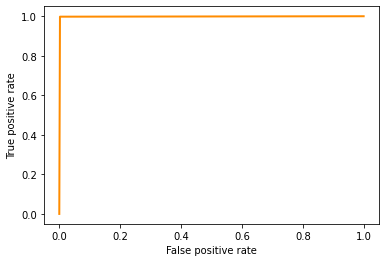

AUC  0.9977859015307032


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test, pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()
print("AUC ", roc_auc)

In [37]:

def draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative):
# total = true_positive + true_negative + false_positive + false_negative
  a = np.asarray([[true_negative,false_positive], [false_negative,true_positive]])
  ax = sns.heatmap(a, annot=True, fmt = "d", cmap="YlGnBu")
  ax.set(xlabel='Predicted Labels', ylabel='True Labels')
  plt.title("Confusion matrix")

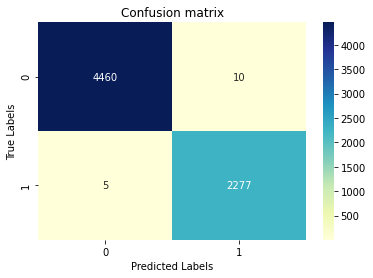

In [38]:
draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative)